##DIP Experiment 4
****

**Name: Mustafa Poonawala**
****
**Roll No.: PB18**
****
**PRN: 1032200939**
****


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt,exp

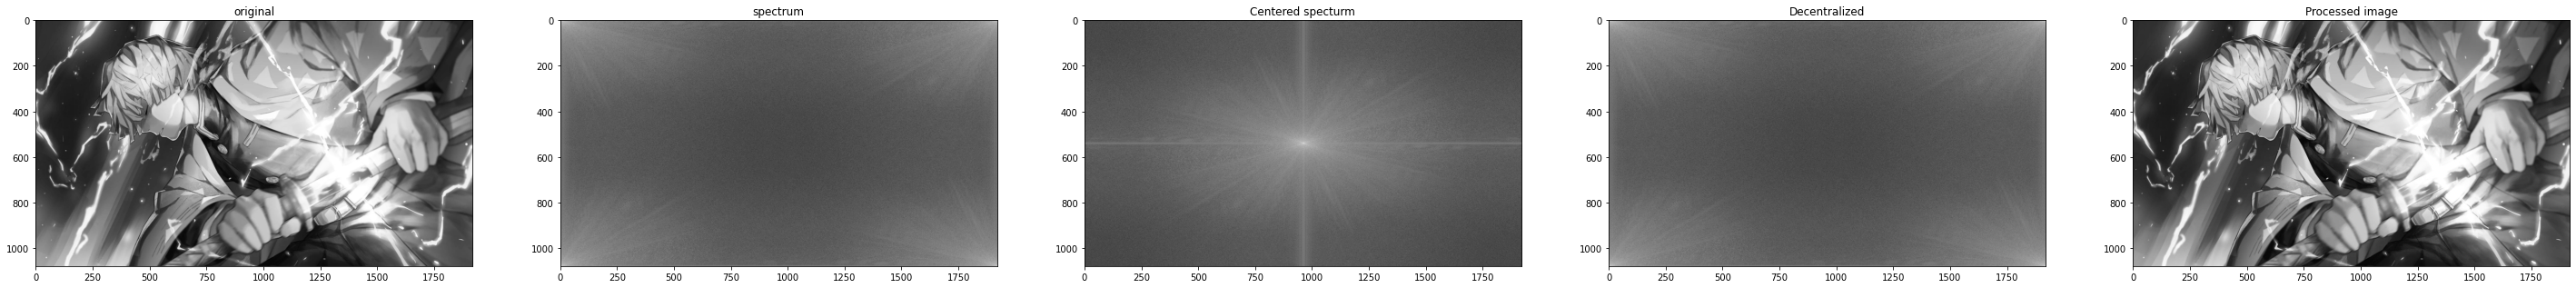

In [ ]:
plt.figure(figsize=(10*5,10*5),constrained_layout=False)
img =cv2.imread("img.jpg",0)
plt.subplot(151),plt.imshow(img, "gray"), plt.title("original")

#original =np.fft.fft2(img)
#plt.subplot(152), plt.imshow(np.log(np.abs(original)),"gray"), plt.title("spectrum")

original =np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("spectrum")

center = np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered specturm")

inv_center=np.fft.fftshift(center)
plt.subplot(154),plt.imshow(np.log(1+np.abs(inv_center)),"gray"), plt.title("Decentralized")

pro_img= np.fft.ifft2(inv_center)
plt.subplot(155),plt.imshow(np.abs(pro_img),"gray"),plt.title("Processed image")


plt.show()

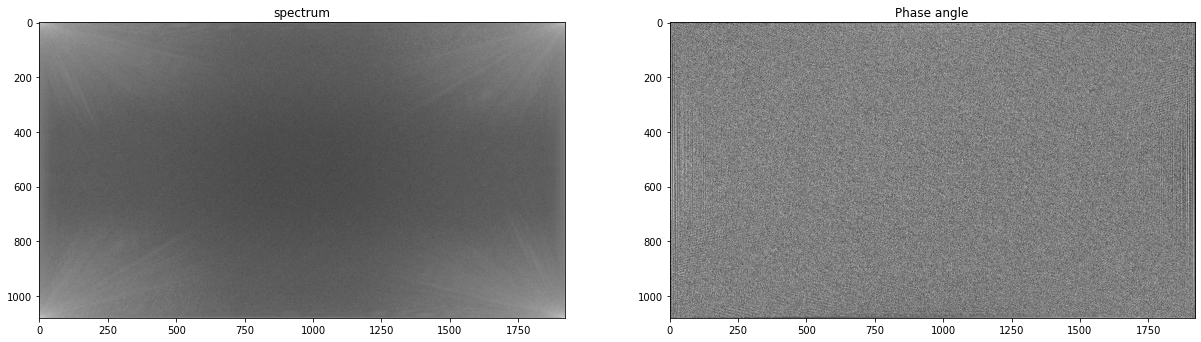

In [ ]:
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)

img=cv2.imread("img.jpg",0)
original =np.fft.fft2(img)
plt.subplot(131),plt.imshow(np.log(np.abs(original)),"gray"),plt.title("spectrum")
plt.subplot(132),plt.imshow(np.angle(original),"gray"),plt.title("Phase angle")

plt.show()

In [ ]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)  #The * (power) operator can #raise a value to the # power of 2.

def idealFilterLP(D0,imgShape):            # ideal Low Pass Filter
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):            # ideal High Pass Filter
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):        # Butterworth Low Pass Filter
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n)) # BLPF Formula
    return base

def butterworthHP(D0,imgShape,n):      # Butterworth High Pass Filter
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):            # Gaussian Low Pass Filter
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):                 # Gaussian High Pass Filter
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

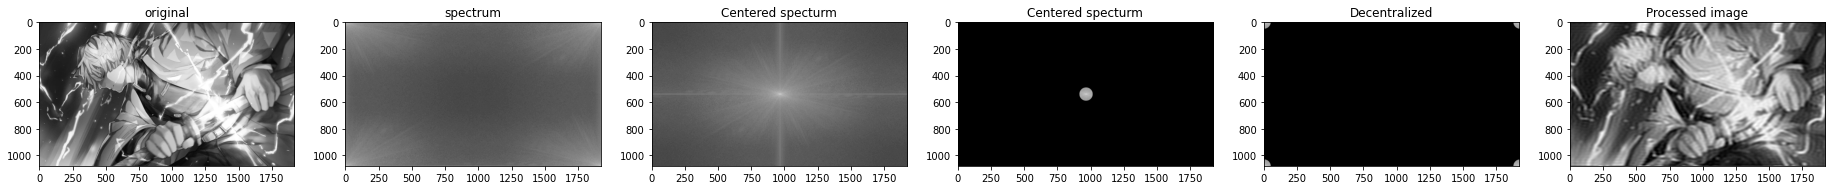

In [ ]:
#Apply Ideal Low filter
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img =cv2.imread("img.jpg",0)
plt.subplot(161),plt.imshow(img, "gray"), plt.title("original")

original =np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("spectrum")

center = np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered specturm")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164),plt.imshow(np.log(1+np.abs(LowPassCenter)),"gray"),plt.title("Centered specturm")


LowPass=np.fft.ifftshift(LowPassCenter)
plt.subplot(165),plt.imshow(np.log(1+np.abs(LowPass)),"gray"), plt.title("Decentralized")

inv_LowPass= np.fft.ifft2(LowPass)
plt.subplot(166),plt.imshow(np.abs(inv_LowPass),"gray"),plt.title("Processed image")


plt.show()

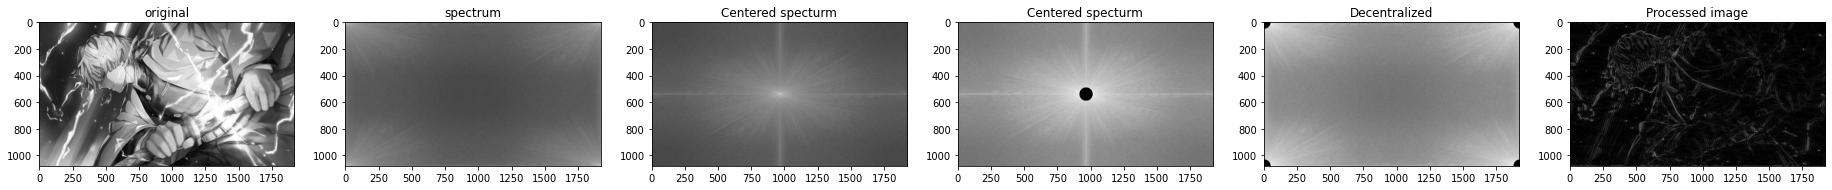

In [ ]:
#Apply Ideal High filter
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img =cv2.imread("img.jpg",0)
plt.subplot(161),plt.imshow(img, "gray"), plt.title("original")

original =np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("spectrum")

center = np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered specturm")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(164),plt.imshow(np.log(1+np.abs(HighPassCenter)),"gray"),plt.title("Centered specturm")


HighPass=np.fft.ifftshift(HighPassCenter)
plt.subplot(165),plt.imshow(np.log(1+np.abs(HighPass)),"gray"), plt.title("Decentralized")

inv_HighPass= np.fft.ifft2(HighPass)
plt.subplot(166),plt.imshow(np.abs(inv_HighPass),"gray"),plt.title("Processed image")


plt.show()

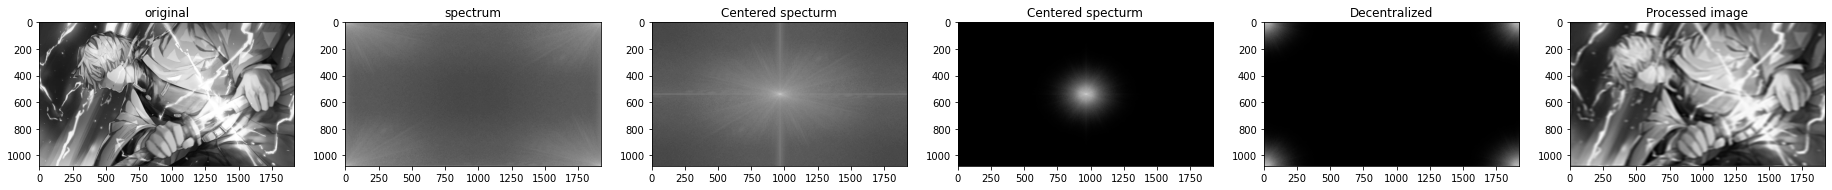

In [ ]:
#Apply Butterworth LP filter
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img =cv2.imread("img.jpg",0)
plt.subplot(161),plt.imshow(img, "gray"), plt.title("original")

original =np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("spectrum")

center = np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered specturm")

BWCenter = center * butterworthLP(50,img.shape,3)
plt.subplot(164),plt.imshow(np.log(1+np.abs(BWCenter)),"gray"),plt.title("Centered specturm")


BWlp=np.fft.ifftshift(BWCenter)
plt.subplot(165),plt.imshow(np.log(1+np.abs(BWlp)),"gray"), plt.title("Decentralized")

inv_BWlp= np.fft.ifft2(BWlp)
plt.subplot(166),plt.imshow(np.abs(inv_BWlp),"gray"),plt.title("Processed image")


plt.show()

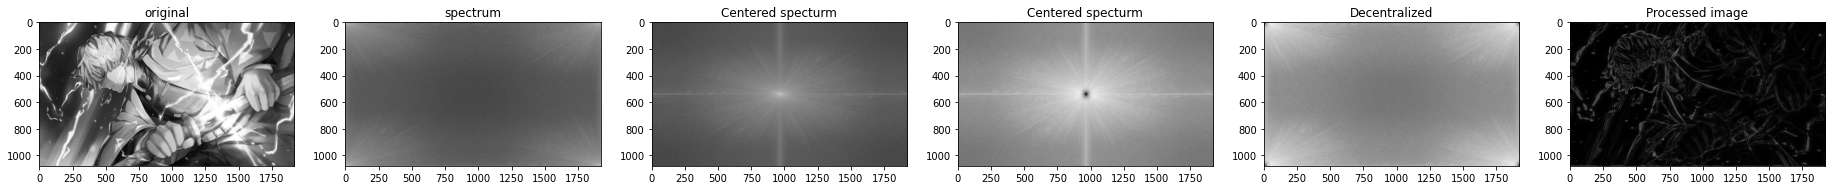

In [ ]:
#Apply Butterworth HP filter
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img =cv2.imread("img.jpg",0)
plt.subplot(161),plt.imshow(img, "gray"), plt.title("original")

original =np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("spectrum")

center = np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered specturm")

BWCenter = center * butterworthHP(50,img.shape,3)
plt.subplot(164),plt.imshow(np.log(1+np.abs(BWCenter)),"gray"),plt.title("Centered specturm")


BWhp=np.fft.ifftshift(BWCenter)
plt.subplot(165),plt.imshow(np.log(1+np.abs(BWhp)),"gray"), plt.title("Decentralized")

inv_BWhp= np.fft.ifft2(BWhp)
plt.subplot(166),plt.imshow(np.abs(inv_BWhp),"gray"),plt.title("Processed image")


plt.show()

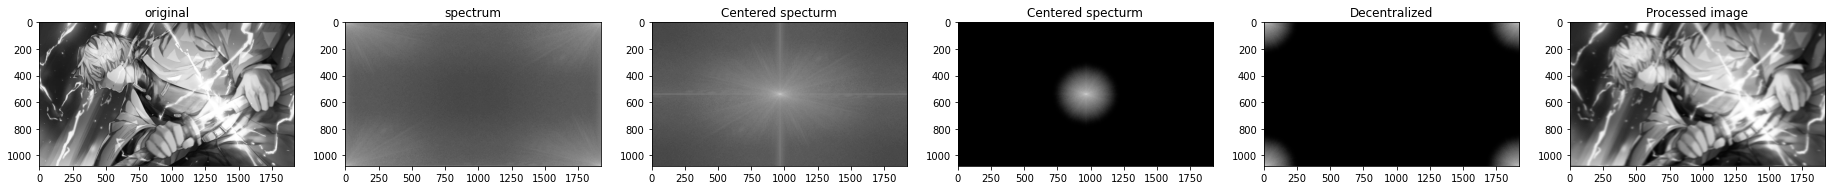

In [ ]:
#Apply Gaussian Low filter
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img =cv2.imread("img.jpg",0)
plt.subplot(161),plt.imshow(img, "gray"), plt.title("original")

original =np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("spectrum")

center = np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered specturm")

LowPassCenter = center * gaussianLP(50,img.shape)
plt.subplot(164),plt.imshow(np.log(1+np.abs(LowPassCenter)),"gray"),plt.title("Centered specturm")


LowPass=np.fft.ifftshift(LowPassCenter)
plt.subplot(165),plt.imshow(np.log(1+np.abs(LowPass)),"gray"), plt.title("Decentralized")

inv_LowPassG= np.fft.ifft2(LowPass)
plt.subplot(166),plt.imshow(np.abs(inv_LowPassG),"gray"),plt.title("Processed image")


plt.show()

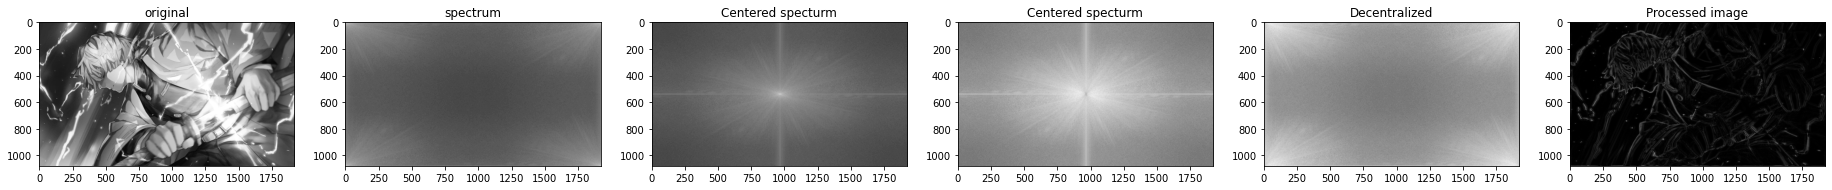

In [ ]:
#Apply Gaussian High filter
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img =cv2.imread("img.jpg",0)
plt.subplot(161),plt.imshow(img, "gray"), plt.title("original")

original =np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("spectrum")

center = np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered specturm")

HighPassCenter = center * gaussianHP(50,img.shape)
plt.subplot(164),plt.imshow(np.log(1+np.abs(HighPassCenter)),"gray"),plt.title("Centered specturm")


HighPass=np.fft.ifftshift(HighPassCenter)
plt.subplot(165),plt.imshow(np.log(1+np.abs(HighPass)),"gray"), plt.title("Decentralized")

inv_HighPassG= np.fft.ifft2(HighPass)
plt.subplot(166),plt.imshow(np.abs(inv_HighPassG),"gray"),plt.title("Processed image")


plt.show()

<Figure size 2304x1728 with 0 Axes>

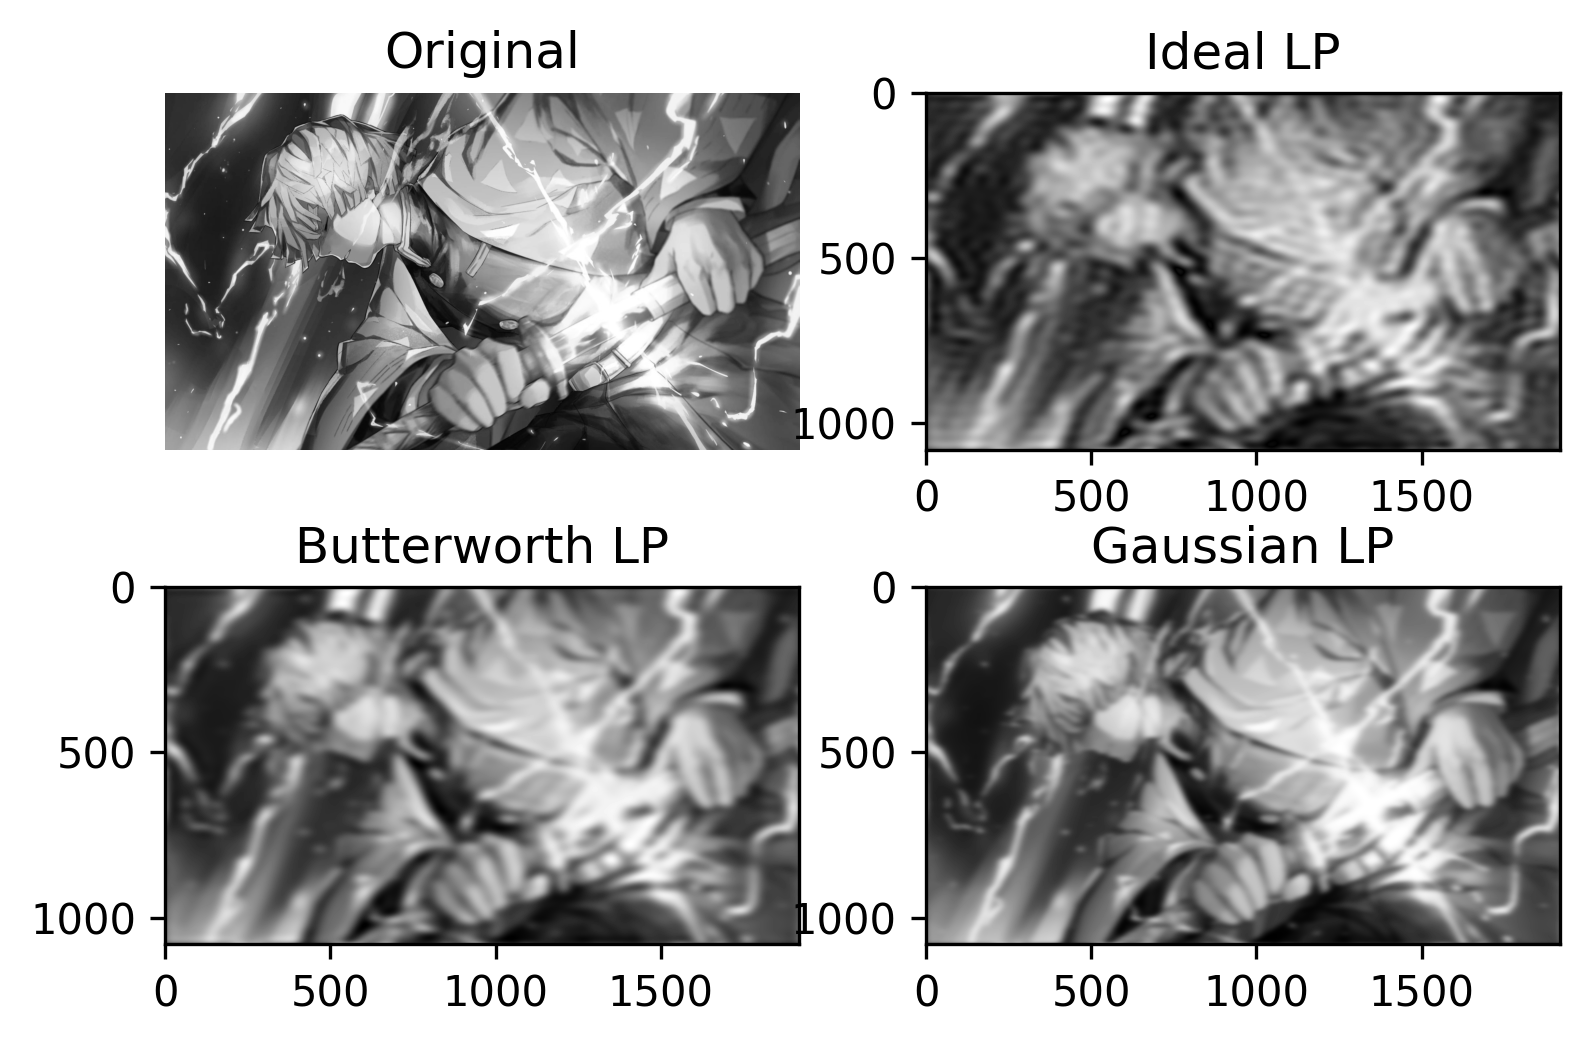

In [ ]:
plt.figure(figsize = (6.4*5,4.8*5),constrained_layout=False)
fig=plt.figure(dpi=300)


img = cv2.imread("img.jpg", 0)
plt.subplot(221),plt.imshow(img, "gray"),plt.title("Original")
plt.axis('off')
original = np.fft.fft2(img)
center=np.fft.fftshift(original)

LowPassCenter = center * idealFilterLP(30,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass=np.fft.ifft2(LowPass)
plt.subplot(222),plt.imshow(np.abs(inverse_LowPass),'gray'), plt.title('Ideal LP')

LowPassCenter = center * butterworthLP(30,img.shape,3)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass=np.fft.ifft2(LowPass)
plt.subplot(223),plt.imshow(np.abs(inverse_LowPass),'gray'), plt.title('Butterworth LP')

LowPassCenter = center * gaussianLP(30,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass=np.fft.ifft2(LowPass)
plt.subplot(224),plt.imshow(np.abs(inverse_LowPass),'gray'), plt.title('Gaussian LP')

plt.show()

<Figure size 2304x1728 with 0 Axes>

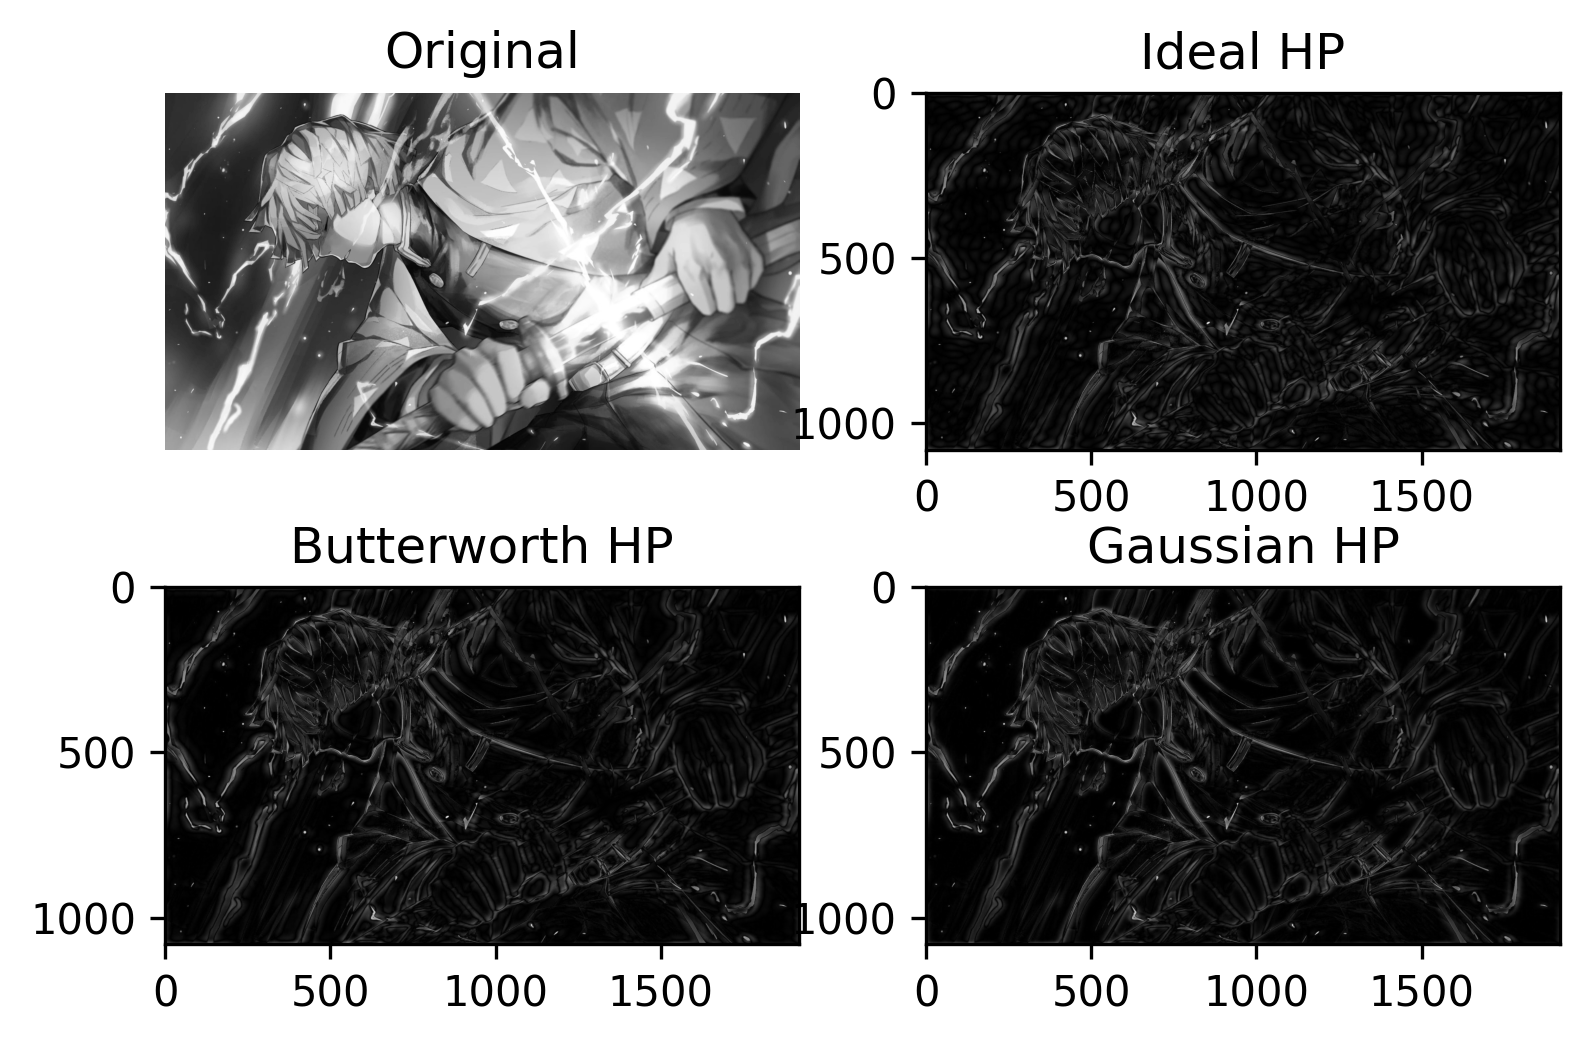

In [ ]:
plt.figure(figsize = (6.4*5,4.8*5),constrained_layout=False)
fig=plt.figure(dpi=300)


img = cv2.imread("img.jpg", 0)
plt.subplot(221),plt.imshow(img, "gray"),plt.title("Original")
plt.axis('off')
original = np.fft.fft2(img)
center=np.fft.fftshift(original)

HighPassCenter = center * idealFilterHP(30,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass=np.fft.ifft2(HighPass)
plt.subplot(222),plt.imshow(np.abs(inverse_HighPass),'gray'), plt.title('Ideal HP')

HighPassCenter = center * butterworthHP(30,img.shape,3)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass=np.fft.ifft2(HighPass)
plt.subplot(223),plt.imshow(np.abs(inverse_HighPass),'gray'), plt.title('Butterworth HP')

HighPassCenter = center * gaussianHP(30,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass=np.fft.ifft2(HighPass)
plt.subplot(224),plt.imshow(np.abs(inverse_HighPass),'gray'), plt.title('Gaussian HP')

plt.show()

1. Determine IDCT of the following 2x2 matrix

  300 100
   
   0 0

2. What is DC coefficient of DFT ofthe following 2x2 matrix?

  15 100

  18 150

  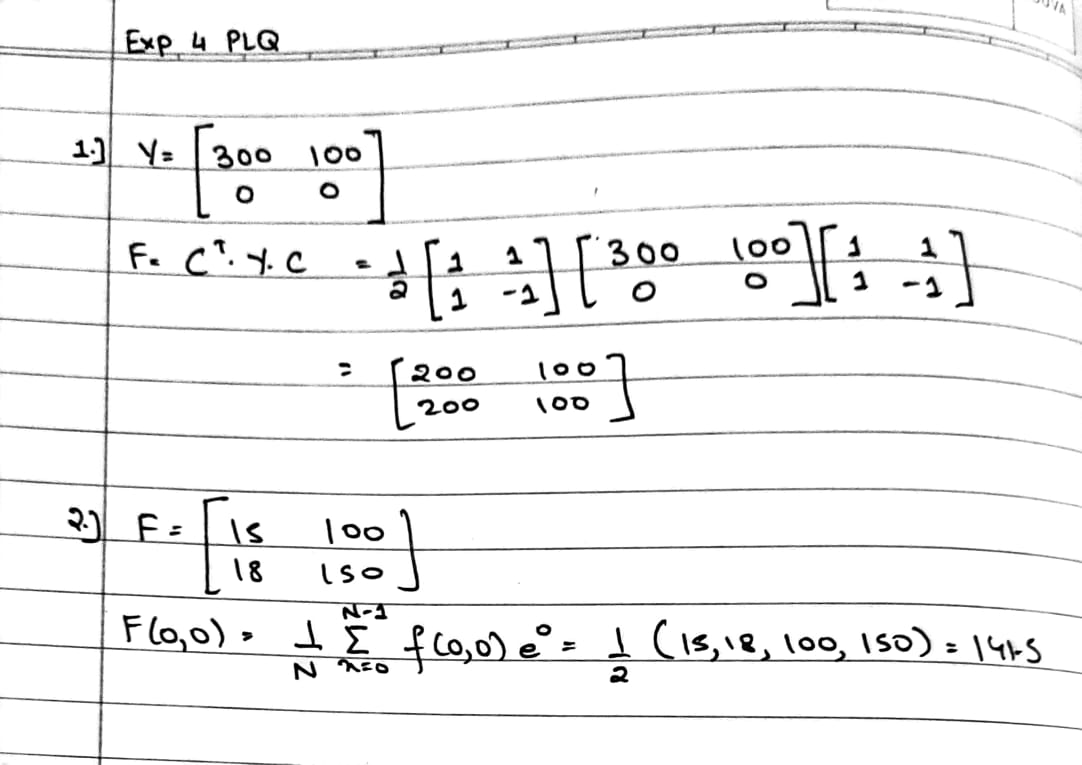